# Первая часть. Исследование

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pprint import pprint

## Загрузка данных (2 балла)
1) Посмотрите на случайные строчки. 
2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [ ]:
data = pd.read_csv('./train.csv')

In [ ]:
# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [ ]:
data.sample() # Отсылаясь к первому пункту задания, посмотрим на случайные объект в нашей выборке

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
3403,51,30.05,1529.45,Male,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Credit card (automatic),0


In [ ]:
data[num_cols] = data[num_cols].apply(pd.to_numeric, errors='coerce')
data.isnull().any() 
# Видим True в TotalSpent - там будут пропущенные значения, заменим на ноль(вероятно так будет лучше)

ClientPeriod                False
MonthlySpending             False
TotalSpent                   True
Sex                         False
IsSeniorCitizen             False
HasPartner                  False
HasChild                    False
HasPhoneService             False
HasMultiplePhoneNumbers     False
HasInternetService          False
HasOnlineSecurityService    False
HasOnlineBackup             False
HasDeviceProtection         False
HasTechSupportAccess        False
HasOnlineTV                 False
HasMovieSubscription        False
HasContractPhone            False
IsBillingPaperless          False
PaymentMethod               False
Churn                       False
dtype: bool

In [ ]:
data["TotalSpent"] = data["TotalSpent"].fillna(0)
data.info() # TotalSpent имеет Dtype float64, в изначальном же сете он был бы object'ом
data_mod = data.copy() # Оставим изначальные данные в покое(мы их уже исправили), чтобы ненароком не повредить во время наших эксперементов

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   float64
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

## Анализ данных (3 балла)
1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 
2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.
3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.
Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

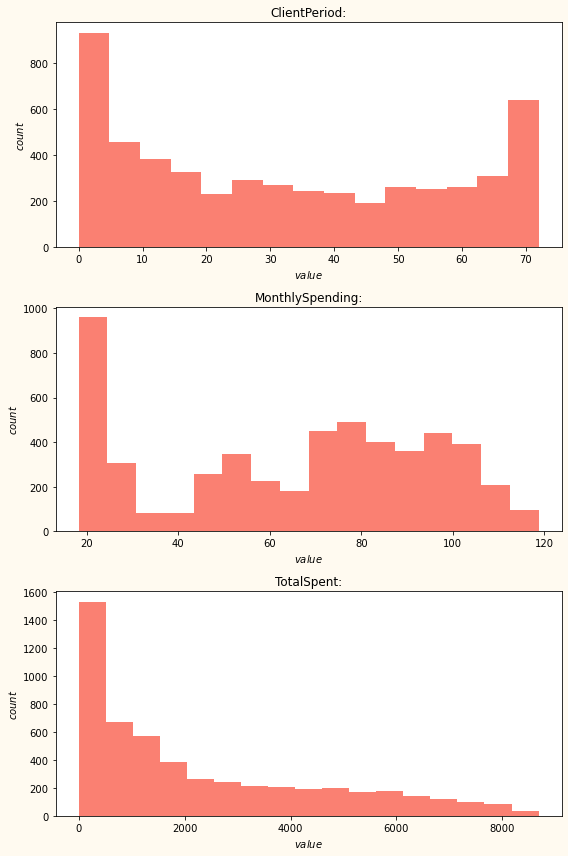

In [ ]:
# ля численных призанков постройте гистограмму (plt.hist(...)) или boxplot (plt.boxplot(...))....
fig, axes_arr = plt.subplots(nrows=3, figsize=(8, 4*3))
fig.set_facecolor('floralwhite')
for id, num_col in enumerate(num_cols):
    ax = axes_arr[id]
    ax.hist(data_mod[num_col], 
            bins=15+id, 
            histtype="stepfilled",
            color="salmon"
    )
    ax.set_title(f'{num_col}:')
    ax.set_xlabel('$value$')
    ax.set_ylabel('$count$')
    
fig.tight_layout()
pass

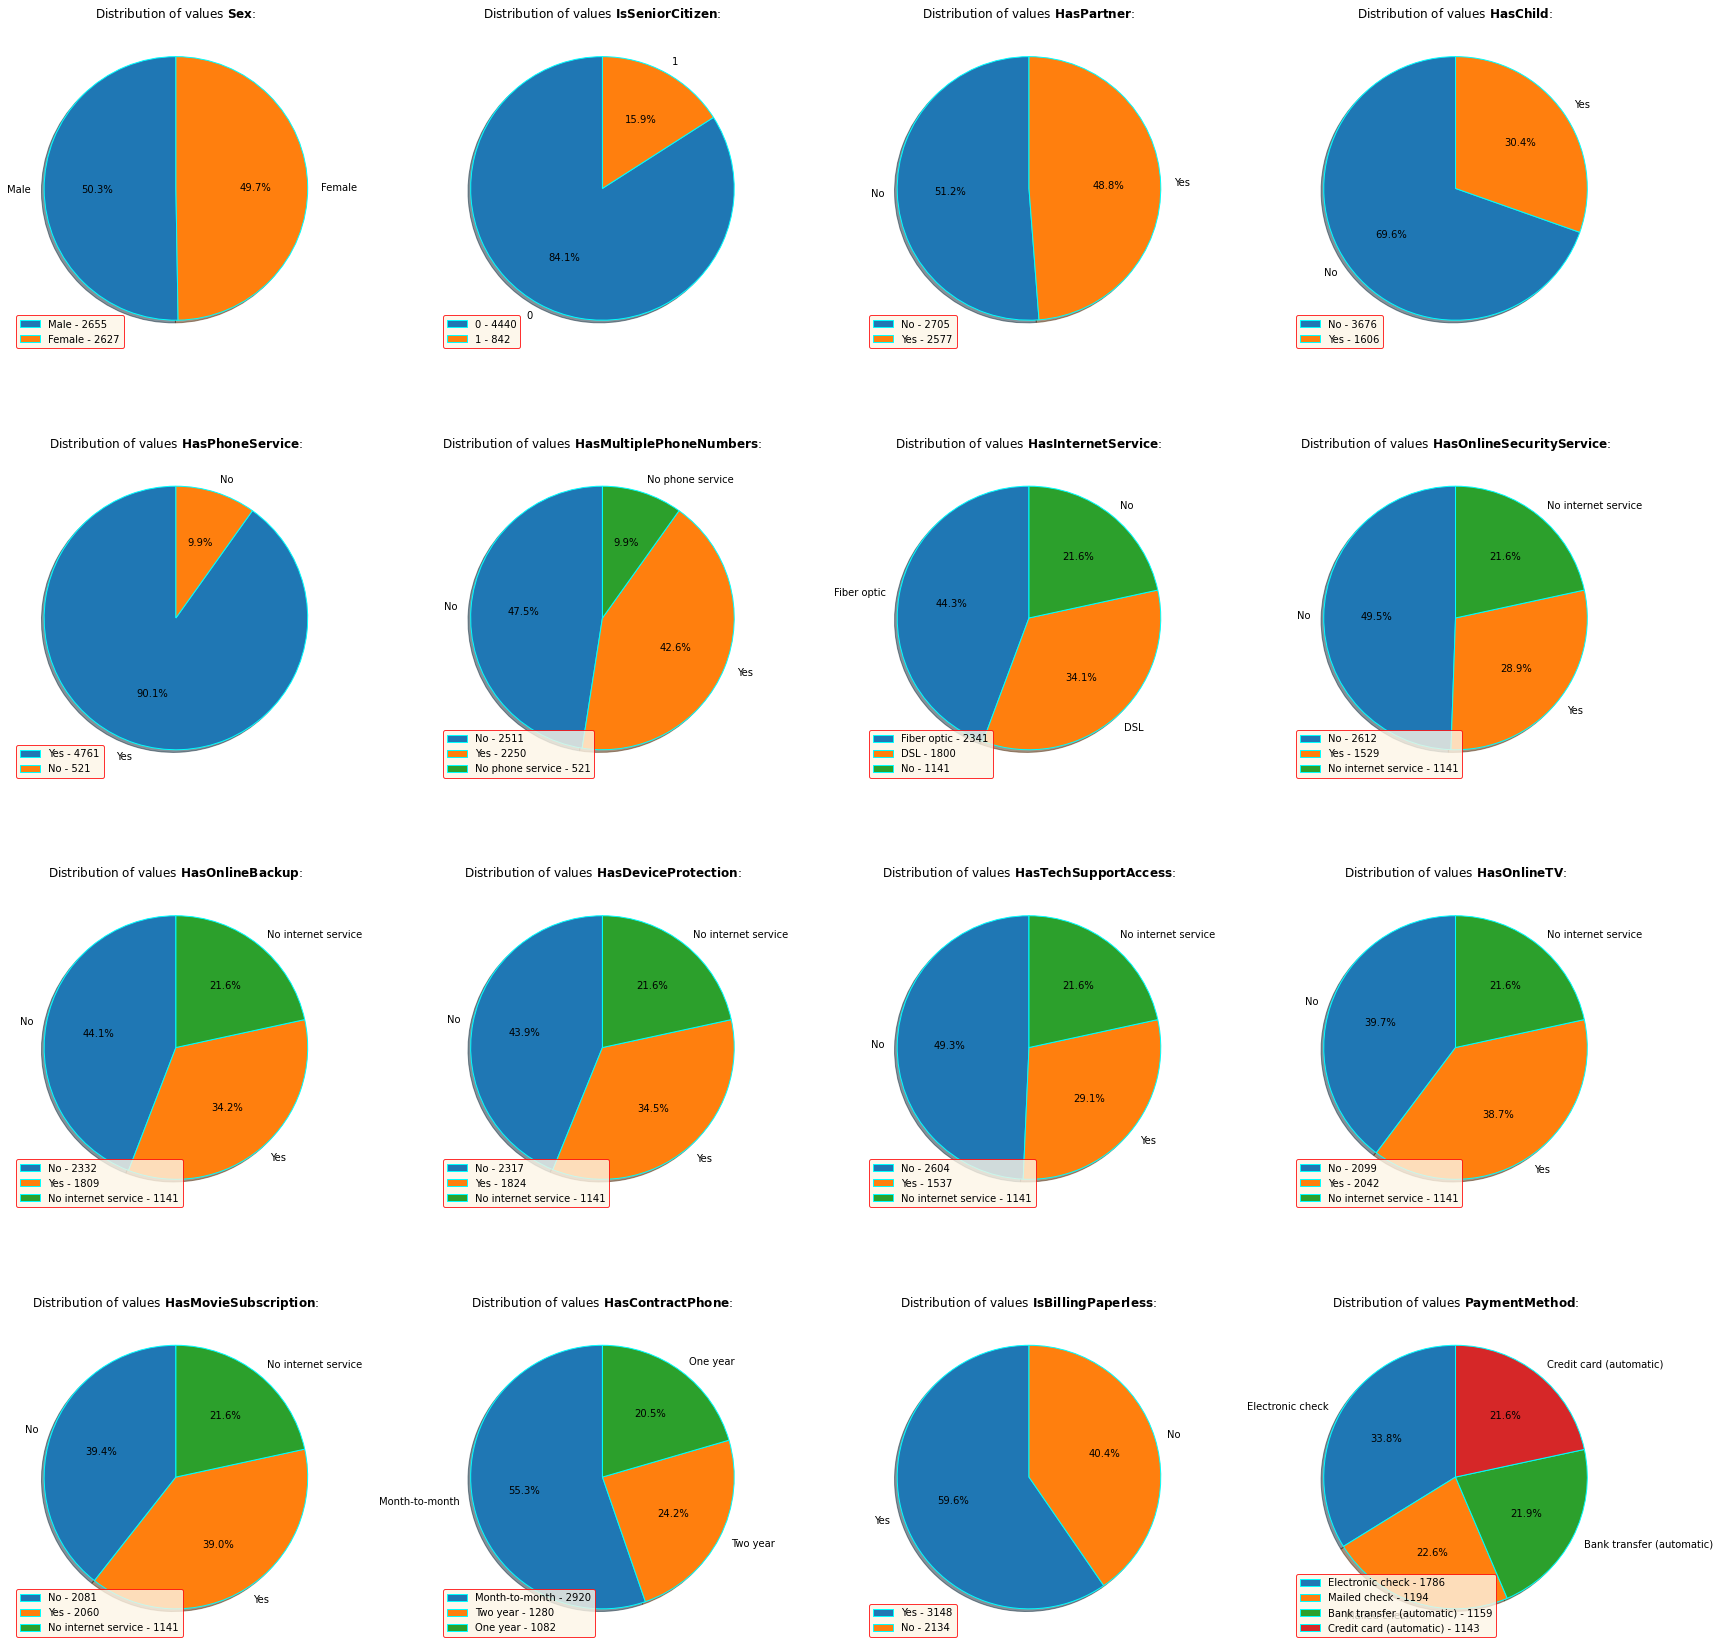

In [ ]:
#  Для категориальных посчитайте количество каждого значения для каждого признака
nrows = len(cat_cols)//4
ncols = 4
fig, axes_arr = plt.subplots(nrows=nrows, ncols=ncols, figsize=(6*ncols, 6*nrows))
for id, cat_col in enumerate(cat_cols):
    x = id % ncols
    y = id // ncols
    ax = axes_arr[y][x]
    v_counts = data_mod[cat_col].value_counts(dropna=False)
    ax.pie(v_counts,
           labels = v_counts.index,
           shadow=True,
           startangle=90,
           autopct = '%1.1f%%',
           wedgeprops= {"edgecolor":"cyan",
                     "linewidth": 1,
                     "antialiased": True}
        )
    ax.set_title(r"Distribution of values "+ r"$\bf{" + cat_col  + "}$:")
    ax.legend(loc='lower left',
              facecolor = 'oldlace',
              edgecolor = 'r',
              labels = v_counts.index.map(lambda label: f'{label} - {v_counts[label]}')
             )
fig.tight_layout()
pass

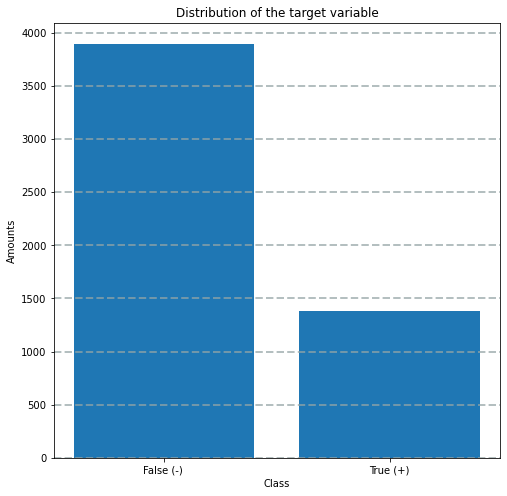

In [ ]:
# Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными...
fig, axes = plt.subplots(figsize=(8,8))
v_counts = data[target_col].value_counts(dropna=False)
axes.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
axes.bar(["False (-) ", "True (+)"], v_counts)
plt.xlabel('Class')
plt.ylabel('Amounts')
plt.title('Distribution of the target variable')
# Очевидно, что классы несбалансированы, нулевой попадается чаще
pass

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [ ]:
# Посмотрим на категориальные признаки; найдем из них те, которые можно заменить в логический тип данных...
bool_cat_cols = []
for cat_col in cat_cols:
    values =  data_mod[cat_col].unique()
    l = len(values)
    print(f'{cat_col} with values({l}):  '.ljust(50) + "; ".join(str(value) for value in values))
    
    if l == 2:
        bool_cat_cols.append((cat_col, tuple(values)))

Sex with values(2):                               Male; Female
IsSeniorCitizen with values(2):                   0; 1
HasPartner with values(2):                        Yes; No
HasChild with values(2):                          Yes; No
HasPhoneService with values(2):                   Yes; No
HasMultiplePhoneNumbers with values(3):           No; Yes; No phone service
HasInternetService with values(3):                No; Fiber optic; DSL
HasOnlineSecurityService with values(3):          No internet service; No; Yes
HasOnlineBackup with values(3):                   No internet service; No; Yes
HasDeviceProtection with values(3):               No internet service; No; Yes
HasTechSupportAccess with values(3):              No internet service; Yes; No
HasOnlineTV with values(3):                       No internet service; No; Yes
HasMovieSubscription with values(3):              No internet service; No; Yes
HasContractPhone with values(3):                  One year; Two year; Month-to-month
Is

In [ ]:
for column, values in bool_cat_cols:
    print(f'{column}:'.ljust(20) +  f'{values}')
    data_mod[column] = data_mod[column].replace(values[0], 1).replace(values[1], 1) # не осуждайте за то, что мужчина будет единичкой, а женщина нулём

Sex:                ('Male', 'Female')
IsSeniorCitizen:    (0, 1)
HasPartner:         ('Yes', 'No')
HasChild:           ('Yes', 'No')
HasPhoneService:    ('Yes', 'No')
IsBillingPaperless: ('No', 'Yes')


In [ ]:
from pandas.api.types import is_numeric_dtype

data_mod.info() # у нас прибавилось количество int64 признаков, поэтому мы должны изменить cat и num признаки

num_cols_mod = []
cat_cols_mod = []

for column in data_mod.columns:
    num_cols_mod.append(column) if is_numeric_dtype(data_mod[column]) else cat_cols_mod.append(column)

num_cols_mod.remove(target_col)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   float64
 3   Sex                       5282 non-null   int64  
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   int64  
 6   HasChild                  5282 non-null   int64  
 7   HasPhoneService           5282 non-null   int64  
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [ ]:
from sklearn.preprocessing import FunctionTransformer
# Теперь нужно сделать трансформер для создания pipeline в дальнейшем, ручками делать это грех
def cat2bool(input_df, cols=bool_cat_cols):
    output_df = input_df.copy()
    for column, values in bool_cat_cols:
        output_df[column] = output_df[column].replace(values[0], 1).replace(values[1], 1)
    return output_df

cat2bool_transformer = FunctionTransformer(cat2bool)

In [ ]:
# посмотрим на датасет, который тестовый - там есть пропуски и вопросики, сделаем ещё один трансформер
def drop_this_shit(input_df):
    return input_df.replace(' ', 0.).replace('?', 0.) # заменяем всё на нолики, причём флотавские, а не интовские

drop_transformer = FunctionTransformer(drop_this_shit)

## Применение линейных моделей (3 балла)
1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 
2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scoring='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 

(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score, roc_curve

In [ ]:
def dummy(input_df, numeric=num_cols_mod, categorial=cat_cols_mod):
    categorial_data = input_df[cat_cols_mod]
    numeric_data = input_df[num_cols_mod]
    dummy_features = pd.get_dummies(categorial_data)
    return pd.concat([numeric_data, dummy_features], axis=1)
    
dummy_tranformer = FunctionTransformer(dummy)

X = dummy(cat2bool(data_mod.drop(target_col, axis=1)))
y = data_mod[target_col]
X.sample()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,IsBillingPaperless,HasMultiplePhoneNumbers_No,...,HasMovieSubscription_No,HasMovieSubscription_No internet service,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
218,31,50.4,1580.1,1,1,1,1,1,1,0,...,0,0,1,0,1,0,0,1,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) # важно, что мы не обучаем scaler на валидационном датасете

In [ ]:
searchCV = LogisticRegressionCV(
    Cs=list(np.power(10.0, np.arange(-10, 10))),
    penalty='l2',
    scoring='roc_auc',
    cv=5,
    max_iter=10,
    fit_intercept=True,
    solver='saga', # оно немного рандомит если что, я просто позапускал несколько раз и получил такой скор
    tol=10)

searchCV.fit(X_train, y_train)

preds_train = searchCV.predict(X_train)
print("TRAIN:", roc_auc_score(y_train, preds_train))
preds_test = searchCV.predict(X_test)
print("TEST:", roc_auc_score(y_test, preds_test))
best_model = make_pipeline(drop_transformer, cat2bool_transformer, dummy_tranformer, scaler, searchCV)

TRAIN: 0.6946065779418338
TEST: 0.6492579208574717


Выпишите какое лучшее качество и с какими параметрами(уже захардкожены) вам удалось получить:
* $TRAIN = 0.7346960004160815$
* $TEST = 0.7485718640001573$
* $KAGGLE = 0.72650$

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [ ]:
import catboost # документация: https://catboost.ai/docs

In [ ]:
scaler = StandardScaler()

X = data.drop(target_col, axis=1)
y = data[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8)

train = catboost.Pool(data=X_train, label=y_train, cat_features=cat_cols)
test = catboost.Pool(data=X_test, label=y_test, cat_features=cat_cols)
all_data = catboost.Pool(data=X, label=y, cat_features=cat_cols)

In [ ]:
param_grid = {
        "learning_rate":[0.02, 0.03, 0.04],
        "min_data_in_leaf":[70, 80, 90, 100],
        "depth": [3, 4, 5],
        "iterations": [195],
         }

Cat = catboost.CatBoostClassifier(metric_period=100, silent=True, eval_metric="AUC") 

# если возникнет ошибка, то перед запуском юпитера нужно прописать "jupyter nbextension enable --py widgetsnbextension"
grid_search_results = Cat.grid_search(param_grid, all_data, verbose=False, plot=True, train_size=0.8, cv=5) # так мы найдем лучшие параметры

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 0.8733639994
bestIteration = 194

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.

bestTest = 0.8724659903
bestIteration = 194

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.

bestTest = 0.8720671405
bestIteration = 194

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.

bestTest = 0.8714987199
bestIteration = 194

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.

bestTest = 0.8725495816
bestIteration = 194

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.

bestTest = 0.8721172953
bestIteration = 100

Metric AUC is not calculated on train by default. To c

In [ ]:
params = grid_search_results["params"]
cv_results = grid_search_results["cv_results"]
print(params)
# вспомним что в бустинге не так выражена проблема переобучения, а ещё то, что чем дольше мы его обучаем, тем лучше у нас выглядят веса(даже если метрики 100%, дальше обучать имеет смысл)
params["iterations"] = 3000 
CuteCat = catboost.CatBoostClassifier(**params, metric_period=100, silent=True, eval_metric="AUC", cat_features=cat_cols)
CuteCat.fit(all_data)

best_model = make_pipeline(drop_transformer, CuteCat)

{'min_data_in_leaf': 70, 'depth': 3, 'iterations': 3000, 'learning_rate': 0.02}


In [ ]:
metrics = CuteCat.eval_metrics(all_data, "AUC") # я всё ещё помню, что обучаю на всём датасете, не обращая внимание на test/train
max(metrics["AUC"])

0.878002595817627

Выпишите какое лучшее качество и с какими параметрами вам удалось получить:
* $TEST = 0.8733639 $
* $KAGGLE = 0.84839 $

# Предсказания

In [ ]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = best_model.predict_proba(X_test) # best_model.predict(X_test) # best_model.predict_proba(X_test) 
submission.to_csv('./my_submission(nobool-cutecat3000-predict_proba).csv', index=False)

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.